# Different Models for Different Users
## Based on User Profile Length

In [1]:
def init_kaggle(run_on_kaggle, secret_name):
    if run_on_kaggle:
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        personal_token = user_secrets.get_secret(secret_name)
        
        import subprocess
        subprocess.run(["git", "clone", "https://" + personal_token + "@github.com/alecontuIT/rec_sys_challenge2022.git"])
        
        import os
        os.chdir("./rec_sys_challenge2022")
        
        subprocess.run(["pip", "install", "-r", "requirements.txt"])
        return True
    
    else:
        return False

In [2]:
kaggle = init_kaggle(False, "recsys_git_token")

In [3]:
import utils
from recmodels import *
from Recommenders.UserProfileRecommender.UserProfileRecommender import UserProfileRec
from Evaluation.Evaluator import EvaluatorHoldout

Tensorflow is not available
Tensorflow is not available


In [4]:
recommender_class = UserProfileRec
dataset_version = "interactions-summed-transformed"
train_percentage = 0.7
seed = 1234

In [5]:
num_groups = 5
cf_rec_classes = []#P3AlphaRec, UserKNNCFRec, ItemKNNCFRec, RP3BetaRec]
cf_rec_versions = []#, "", "", ""]#, EASE_R_Rec]#, IALSRec, SLIM_BPRRec]
cb_rec_classes = []#ItemKNNCBFRec]

In [6]:
URM_all, URM_train, URM_validation, ICM = utils.get_data_global_sample(dataset_version=dataset_version, 
                                                                       train_percentage=0.7,
                                                                       setSeed=True,
                                                                       k=1,
                                                                       transformation="tanh")
evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])

EvaluatorHoldout: Ignoring 31 ( 0.1%) Users that have less than 1 test interactions


In [7]:
# N.B. if you want to validate the whole recommender you need to set seed=None, and the URM_train=URM_train
recommender = UserProfileRec(URM_train = URM_all, 
                             ICM_train = ICM, 
                             cf_rec_classes = cf_rec_classes, 
                             cb_rec_classes = cb_rec_classes, 
                             cf_rec_versions = cf_rec_versions,
                             dataset_version = dataset_version, 
                             best_model_for_user_profile_perc = train_percentage, 
                             seed = seed)

UserProfileRecommender: URM Detected 3461 (12.4%) items with no interactions.


Users group size: 8326


Group 0, #users in group 8326, average p.len 11.06, median 11.0, min 3, max 14
Group 1, #users in group 8326, average p.len 15.79, median 16.0, min 14, max 18
Group 2, #users in group 8326, average p.len 20.26, median 20.0, min 18, max 23
Group 3, #users in group 8326, average p.len 27.42, median 27.0, min 23, max 33
Group 4, #users in group 8325, average p.len 56.19, median 46.0, min 33, max 861
P3alphaRecommender: URM Detected 3461 (12.4%) items with no interactions.
P3alphaRecommender: Loading model from file 'recommendations/interactions-summed-transformed/P3alphaRecommender/topK-124_alpha-1.0_min_rating-0_implicit-False_normalize_similarity-True/optimizationP3alphaRecommender_best_model.zip'
P3alphaRecommender: Loading complete
UserKNNCFRecommender: URM Detected 3461 (12.4%) items with no interactions.
UserKNNCFRecommender: Loading model from file 'recommendations/interactions-summed-transformed/UserKNNCFRecommender/topK-800_shrink-1_feature_weighting-none

CUTOFF: 10 - PRECISION: 0.0640591, PRECISION_RECALL_MIN_DEN: 0.0787659, RECALL: 0.0725773, MAP: 0.0322726, MAP_MIN_DEN: 0.0394186, MRR: 0.2203037, NDCG: 0.1002441, F1: 0.0680527, HIT_RATE: 0.4352319, ARHR_ALL_HITS: 0.2655785, NOVELTY: 0.0037024, AVERAGE_POPULARITY: 0.2171643, DIVERSITY_MEAN_INTER_LIST: 0.9206680, DIVERSITY_HERFINDAHL: 0.9920557, COVERAGE_ITEM: 0.1147740, COVERAGE_ITEM_HIT: 0.0259582, ITEMS_IN_GT: 0.8762514, COVERAGE_USER: 0.9995196, COVERAGE_USER_HIT: 0.4350228, USERS_IN_GT: 0.9995196, DIVERSITY_GINI: 0.0134375, SHANNON_ENTROPY: 8.4375398, RATIO_DIVERSITY_HERFINDAHL: 0.9923835, RATIO_DIVERSITY_GINI: 0.0303539, RATIO_SHANNON_ENTROPY: 0.6254546, RATIO_AVERAGE_POPULARITY: 4.2973479, RATIO_NOVELTY: 0.2936278, 

EvaluatorHoldout: Processed 8322 (100.0%) in 5.01 sec. Users per second: 1662
CUTOFF: 10 - PRECISION: 0.0605624, PRECISION_RECALL_MIN_DEN: 0.0744532, RECALL: 0.0686579, MAP: 0.0309034, MAP_MIN_DEN: 0.0379307, MRR: 0.2149969, NDCG: 0.0962951, F1: 0.0643565, HIT_RATE:

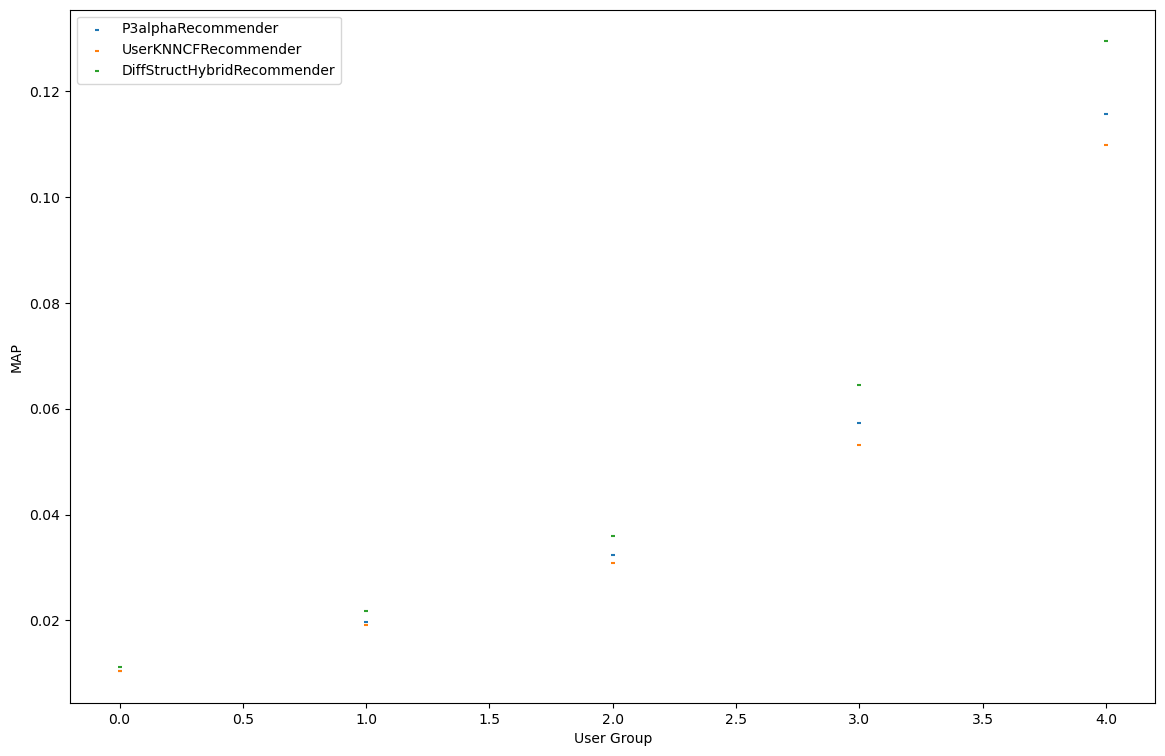

DiffStructHybridRecommender: URM Detected 3461 (12.4%) items with no interactions.
DiffStructHybridRecommender: Loading model from file 'recommendations/interactions-summed-transformed/DiffStructHybridRecommender/EASE_R_RP3betaP3alpha/optimizationDiffStructHybridRecommender_best_model.zip'
DiffStructHybridRecommender: Loading complete
DiffStructHybridRecommender: URM Detected 3461 (12.4%) items with no interactions.
DiffStructHybridRecommender: Loading model from file 'recommendations/interactions-summed-transformed/DiffStructHybridRecommender/EASE_R_RP3beta/optimizationDiffStructHybridRecommender_best_model.zip'
DiffStructHybridRecommender: Loading complete
EASE_R_Recommender: URM Detected 3461 (12.4%) items with no interactions.
EASE_R_Recommender: Loading model from file 'recommendations/interactions-summed-transformed/EASE_R_Recommender/topK-337_l2_norm-2466.5428241558093_normalize_metrics-False/bestEASE_R_Recommender.zip'
EASE_R_Recommender: Loading complete
RP3betaRecommender: UR

In [8]:
recommender.fit(num_groups, clustering_strategy="equal-parts")

In [8]:
ease = utils.load_best_model(URM_train, 
                                            EASE_R_Rec, 
                                            dataset_version=dataset_version, 
                                            optimization=True)
rp3beta = utils.load_best_model(URM_train, 
                                            RP3BetaRec, 
                                            dataset_version=dataset_version, 
                                            optimization=True)

EASE_R_Recommender: URM Detected 3461 (12.4%) items with no interactions.
EASE_R_Recommender: Loading model from file 'recommendations/interactions-summed-transformed/EASE_R_Recommender/topK-337_l2_norm-2466.5428241558093_normalize_metrics-False/optimizationEASE_R_Recommender_best_model.zip'
EASE_R_Recommender: Loading complete
RP3betaRecommender: URM Detected 3461 (12.4%) items with no interactions.
RP3betaRecommender: Loading model from file 'recommendations/interactions-summed-transformed/RP3betaRecommender/topK-50_beta-0.29826014886479874_alpha-0.9115443137489105_min_rating-0_implicit-False_normalize_similarity-True/optimizationRP3betaRecommender_best_model.zip'
RP3betaRecommender: Loading complete


In [11]:
recommender.optimize_2hybrids_on_group(num_groups=6, 
                                       hybrid_class=DiffStructHybridRecommender, 
                                       trained_recs_arg = [ease, rp3beta],
                                       n_cases=4, 
                                       perc_random_starts=0.5, 
                                       clustering_strategy="equal-parts", 
                                       allow_normalization=True, 
                                       allow_alphas_sum_to_one=False,
                                       root="EASE_RRP3Beta")


Users group size: 6939


Group 0, #users in group 6939, average p.len 10.60, median 11.0, min 3, max 13
Group 1, #users in group 6939, average p.len 14.73, median 15.0, min 13, max 16
Group 2, #users in group 6939, average p.len 18.27, median 18.0, min 16, max 20
Group 3, #users in group 6939, average p.len 22.60, median 22.0, min 20, max 26
Group 4, #users in group 6939, average p.len 30.25, median 30.0, min 26, max 37
Group 5, #users in group 6934, average p.len 60.43, median 49.0, min 37, max 861
EvaluatorHoldout: Ignoring 31 ( 0.1%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 34690 Users
Iteration No: 1 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'w0': 9.977972901228002, 'w1': 6.439010306373221, 'normalize': 'inf', 'alphas_sum_to_one': False}
DiffStructHybridRecommender: URM Detected 3461 (12.4%) items with no interactions.
EvaluatorHoldout: Processed 6927 (100.0%) in 4.49 sec. Users per second: 1542
SearchBayesia

EvaluatorHoldout: Processed 6928 (100.0%) in 3.19 sec. Users per second: 2170
SearchBayesianSkopt: New best config found. Config 1: {'w0': 6.499776759710563, 'w1': 9.539426785987818, 'normalize': None, 'alphas_sum_to_one': False} - results: PRECISION: 0.0359267, PRECISION_RECALL_MIN_DEN: 0.0507993, RECALL: 0.0488370, MAP: 0.0183700, MAP_MIN_DEN: 0.0253692, MRR: 0.1353388, NDCG: 0.0639349, F1: 0.0413987, HIT_RATE: 0.2658776, ARHR_ALL_HITS: 0.1570664, NOVELTY: 0.0039429, AVERAGE_POPULARITY: 0.1762109, DIVERSITY_MEAN_INTER_LIST: 0.9538372, DIVERSITY_HERFINDAHL: 0.9953699, COVERAGE_ITEM: 0.2236842, COVERAGE_ITEM_HIT: 0.0224900, ITEMS_IN_GT: 0.8762514, COVERAGE_USER: 0.9984148, COVERAGE_USER_HIT: 0.2654561, USERS_IN_GT: 0.9984148, DIVERSITY_GINI: 0.0373009, SHANNON_ENTROPY: 9.6512482, RATIO_DIVERSITY_HERFINDAHL: 0.9956989, RATIO_DIVERSITY_GINI: 0.0842592, RATIO_SHANNON_ENTROPY: 0.7154239, RATIO_AVERAGE_POPULARITY: 3.4869438, RATIO_NOVELTY: 0.3126977, 

SearchBayesianSkopt: Saving model in r

Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 4.2686
Function value obtained: -0.0279
Current minimum: -0.0279
Iteration No: 4 started. Searching for the next optimal point.
SearchBayesianSkopt: Testing config: {'w0': 0.01857375233050407, 'w1': 1.5180174708508123, 'normalize': None, 'alphas_sum_to_one': False}
DiffStructHybridRecommender: URM Detected 3461 (12.4%) items with no interactions.
EvaluatorHoldout: Processed 6934 (100.0%) in 3.75 sec. Users per second: 1847
SearchBayesianSkopt: Config 3 is suboptimal. Config: {'w0': 0.01857375233050407, 'w1': 1.5180174708508123, 'normalize': None, 'alphas_sum_to_one': False} - results: PRECISION: 0.0512980, PRECISION_RECALL_MIN_DEN: 0.0668152, RECALL: 0.0633584, MAP: 0.0266314, MAP_MIN_DEN: 0.0343950, MRR: 0.1934497, NDCG: 0.0874208, F1: 0.0566939, HIT_RATE: 0.3658783, ARHR_ALL_HITS: 0.2260811, NOVELTY: 0.0040394, AVERAGE_POPULARITY: 0.1696453, DIVERSITY_MEAN_INTER_LIST: 0.9555217, DIVERSITY_HERFINDAHL: 0.995

EvaluatorHoldout: Processed 6939 (100.0%) in 4.42 sec. Users per second: 1568
SearchBayesianSkopt: New best config found. Config 0: {'w0': 0.7954992977656651, 'w1': 8.793801137352444, 'normalize': None, 'alphas_sum_to_one': False} - results: PRECISION: 0.1371379, PRECISION_RECALL_MIN_DEN: 0.1451395, RECALL: 0.1116808, MAP: 0.0730681, MAP_MIN_DEN: 0.0768931, MRR: 0.3897895, NDCG: 0.1707404, F1: 0.1231071, HIT_RATE: 0.7113417, ARHR_ALL_HITS: 0.5293011, NOVELTY: 0.0037852, AVERAGE_POPULARITY: 0.1849588, DIVERSITY_MEAN_INTER_LIST: 0.9481314, DIVERSITY_HERFINDAHL: 0.9947995, COVERAGE_ITEM: 0.0777317, COVERAGE_ITEM_HIT: 0.0370423, ITEMS_IN_GT: 0.8762514, COVERAGE_USER: 1.0000000, COVERAGE_USER_HIT: 0.7113417, USERS_IN_GT: 1.0000000, DIVERSITY_GINI: 0.0136819, SHANNON_ENTROPY: 8.7673708, RATIO_DIVERSITY_HERFINDAHL: 0.9951282, RATIO_DIVERSITY_GINI: 0.0309062, RATIO_SHANNON_ENTROPY: 0.6499042, RATIO_AVERAGE_POPULARITY: 3.6600501, RATIO_NOVELTY: 0.3001894, 

SearchBayesianSkopt: Saving model in 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.0825
Function value obtained: -0.1324
Current minimum: -0.1324
Iteration No: 2 started. Evaluating function at random point.
SearchBayesianSkopt: Testing config: {'w0': 9.695470540237853, 'w1': 8.602443440251172, 'normalize': None, 'alphas_sum_to_one': False}
DiffStructHybridRecommender: URM Detected 3461 (12.4%) items with no interactions.
EvaluatorHoldout: Processed 6934 (100.0%) in 6.49 sec. Users per second: 1068
SearchBayesianSkopt: New best config found. Config 1: {'w0': 9.695470540237853, 'w1': 8.602443440251172, 'normalize': None, 'alphas_sum_to_one': False} - results: PRECISION: 0.2373666, PRECISION_RECALL_MIN_DEN: 0.2382073, RECALL: 0.1065278, MAP: 0.1364178, MAP_MIN_DEN: 0.1368405, MRR: 0.5263596, NDCG: 0.2324259, F1: 0.1470575, HIT_RATE: 0.8826074, ARHR_ALL_HITS: 0.8357193, NOVELTY: 0.0037536, AVERAGE_POPULARITY: 0.1843607, DIVERSITY_MEAN_INTER_LIST: 0.9466567, DIVERSITY_HERFINDAHL: 0.9946520, COVERAGE_IT

KeyboardInterrupt: 

In [8]:
recommender.recommend(utils.get_users_for_submission(), cutoff=10)

num all recs best: #2
Users group size: 8326


Group 0, #users in group 8326, average p.len 16.61, median 17.0, min 5, max 20
Group 1, #users in group 8326, average p.len 22.66, median 23.0, min 20, max 25
Group 2, #users in group 8326, average p.len 28.73, median 29.0, min 25, max 33
Group 3, #users in group 8326, average p.len 38.93, median 38.0, min 33, max 47
Group 4, #users in group 8325, average p.len 79.79, median 65.0, min 47, max 1206
num users groups (masks): #5
scores.shape:(0, 27968)
scores.shape:(8085, 27968)

users.shape:(0,)
users.shape:(8085,)

scores.shape:(8085, 27968)
scores.shape:(16234, 27968)

users.shape:(8085,)
users.shape:(16234,)

scores.shape:(16234, 27968)
scores.shape:(24489, 27968)

users.shape:(16234,)
users.shape:(24489,)

scores.shape:(24489, 27968)
scores.shape:(32794, 27968)

users.shape:(24489,)
users.shape:(32794,)

scores.shape:(32794, 27968)
scores.shape:(41116, 27968)

users.shape:(32794,)
users.shape:(41116,)

final users.shape:(41116,)

final s

[[2494, 750, 828, 391, 107, 5, 14710, 1532, 2488, 29],
 [6874, 665, 21, 61, 1689, 24, 537, 124, 352, 18251],
 [121, 7864, 8819, 453, 18939, 22441, 22631, 17075, 6712, 15978],
 [20, 21, 121, 352, 676, 750, 23, 109, 393, 174],
 [23, 80, 68, 2106, 2119, 64, 21, 124, 2111, 2112],
 [10953, 16513, 4631, 14624, 23973, 23995, 20340, 9874, 4147, 7783],
 [23, 60, 21, 62, 521, 895, 272, 393, 270, 20532],
 [21, 676, 672, 1616, 1154, 22, 62, 58, 7569, 364],
 [111, 2442, 24142, 3707, 453, 22405, 8084, 3951, 14518, 9733],
 [21, 23, 58, 828, 1849, 62, 27, 353, 1532, 272],
 [22, 177, 7077, 12816, 13359, 22823, 5804, 5198, 354, 17262],
 [11660, 2086, 21, 16516, 2117, 8650, 71, 1154, 95, 10177],
 [750, 2494, 149, 673, 5735, 102, 130, 93, 21, 109],
 [450, 557, 100, 4872, 6149, 177, 1849, 13420, 22591, 13229],
 [22, 23, 11363, 448, 124, 14118, 2472, 446, 453, 13988],
 [22, 14460, 23, 22472, 7569, 7632, 22370, 22414, 771, 3539],
 [17297, 17199, 9353, 7144, 18210, 1648, 14500, 1992, 7804, 1891],
 [22, 1911, 

In [10]:
cjrkcl
import pathlib
p = utils.get_folder_best_model(P3AlphaRec, dataset_version)
path = pathlib.PurePath(p)
path.name

NameError: name 'cjrkcl' is not defined

In [ ]:
prediction = utils.submission(recommender, dataset_version)